Kita import library dulu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

Abis itu kita read Dataset dan cek sekilas ada apa saja di dataset

In [ ]:
dataset_nama = r'Placement_Data_Full_Class.csv'
data = pd.read_csv(dataset_nama)
data.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [ ]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Kita cari informasi yang bisa diambil dari dataset. Display dataset yang bersifat non-numerik

In [ ]:
for col in data.columns:
  if data.dtypes[col] != "object":
    continue
  print('-'*10 + col + '-'*10)
  display(data[col].value_counts())
  print('-'*30)

----------gender----------


M    139
F     76
Name: gender, dtype: int64

------------------------------
----------ssc_b----------


Central    116
Others      99
Name: ssc_b, dtype: int64

------------------------------
----------hsc_b----------


Others     131
Central     84
Name: hsc_b, dtype: int64

------------------------------
----------hsc_s----------


Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

------------------------------
----------degree_t----------


Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

------------------------------
----------workex----------


No     141
Yes     74
Name: workex, dtype: int64

------------------------------
----------specialisation----------


Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

------------------------------
----------status----------


Placed        148
Not Placed     67
Name: status, dtype: int64

------------------------------


Informasi pada data:



1. Jumlah gender lebih banyak Pria daripada Wanita.
2. Studi yang diambil paling banyak di bidang penjualan.
3. Data mahasiswa yang belum pernah bekerja lebih banyak daripada yang sudah ada pengalaman bekerja.
4. Total data yang diterima lebih banyak daripada yang ditolak.






Kita cek missing values pada dataset

<Axes: >

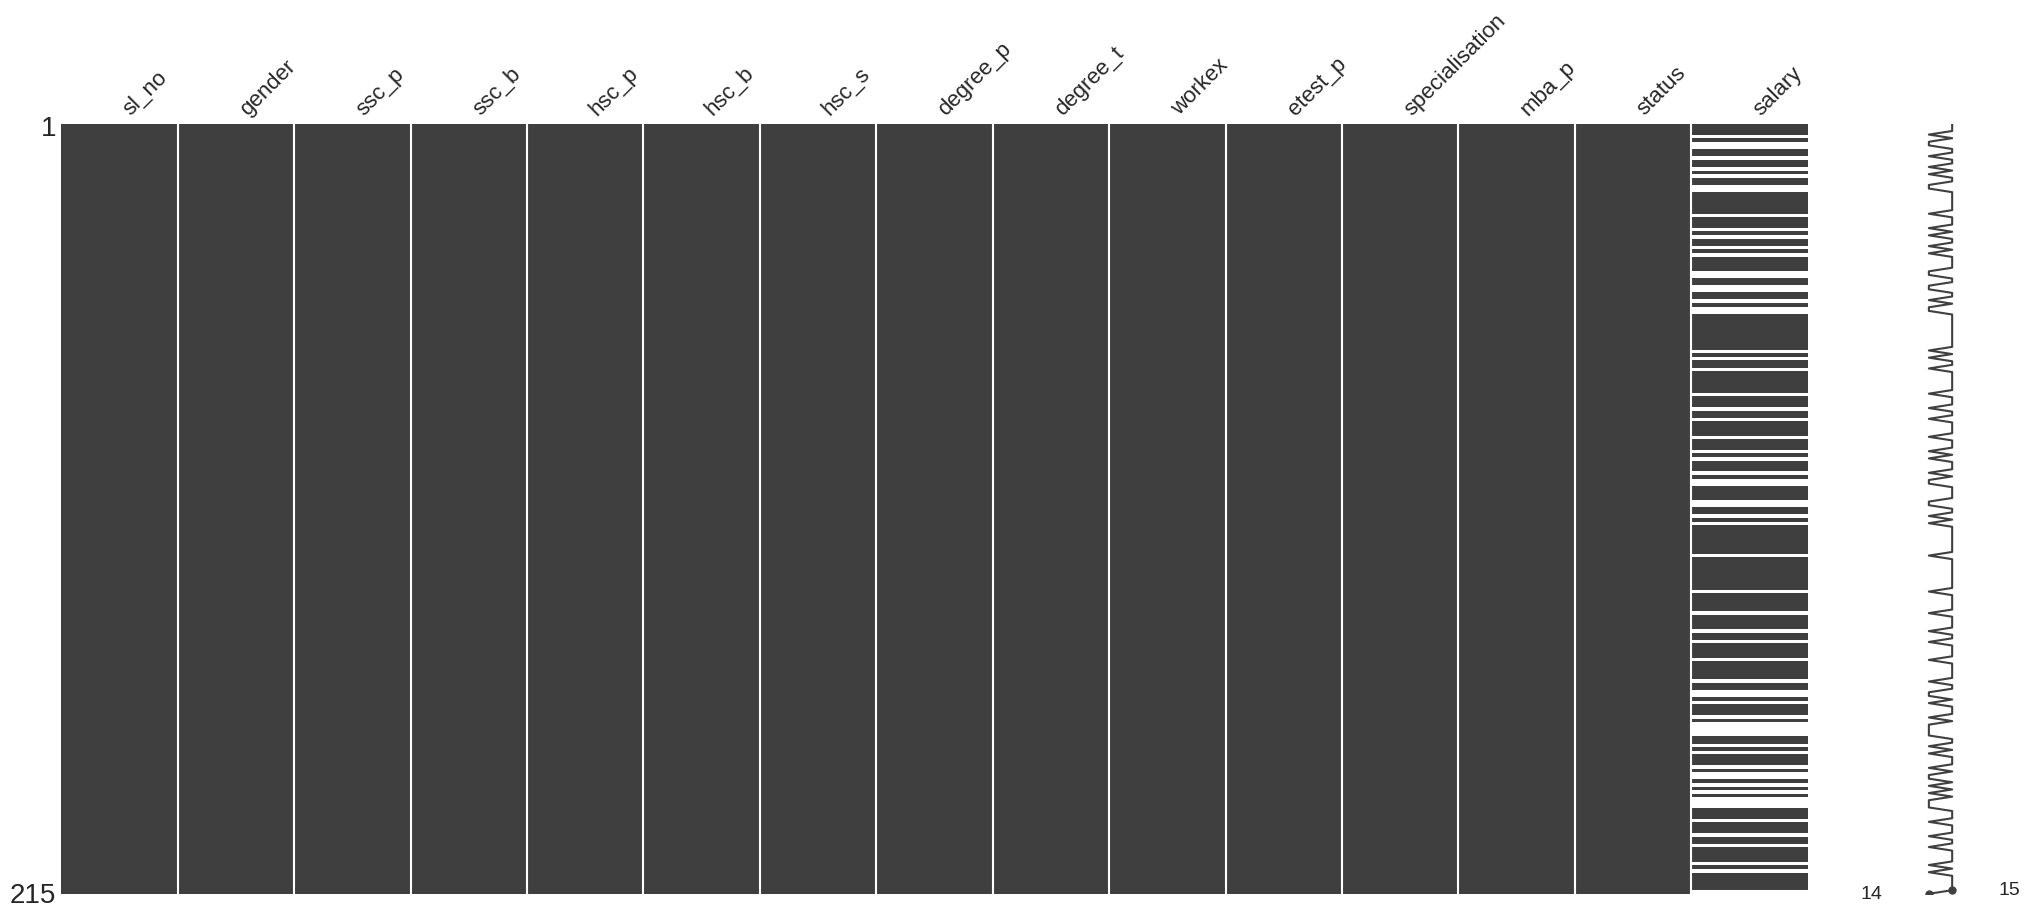

In [ ]:
import missingno as msno
msno.matrix(data)

Kolom yang kosong terdapat di salary saja

Kita lanjutkan dengan data cleaning
Data yang berkualitas memiliki kriteria sebagai berikut:


1.   Data valid
2.   Data akurat
3.   Data tidak kosong
4.   Tipe data konsisten
5.   Sifat data seragam



Data yang bernilai NaN diganti dengan nilai 0

<Axes: >

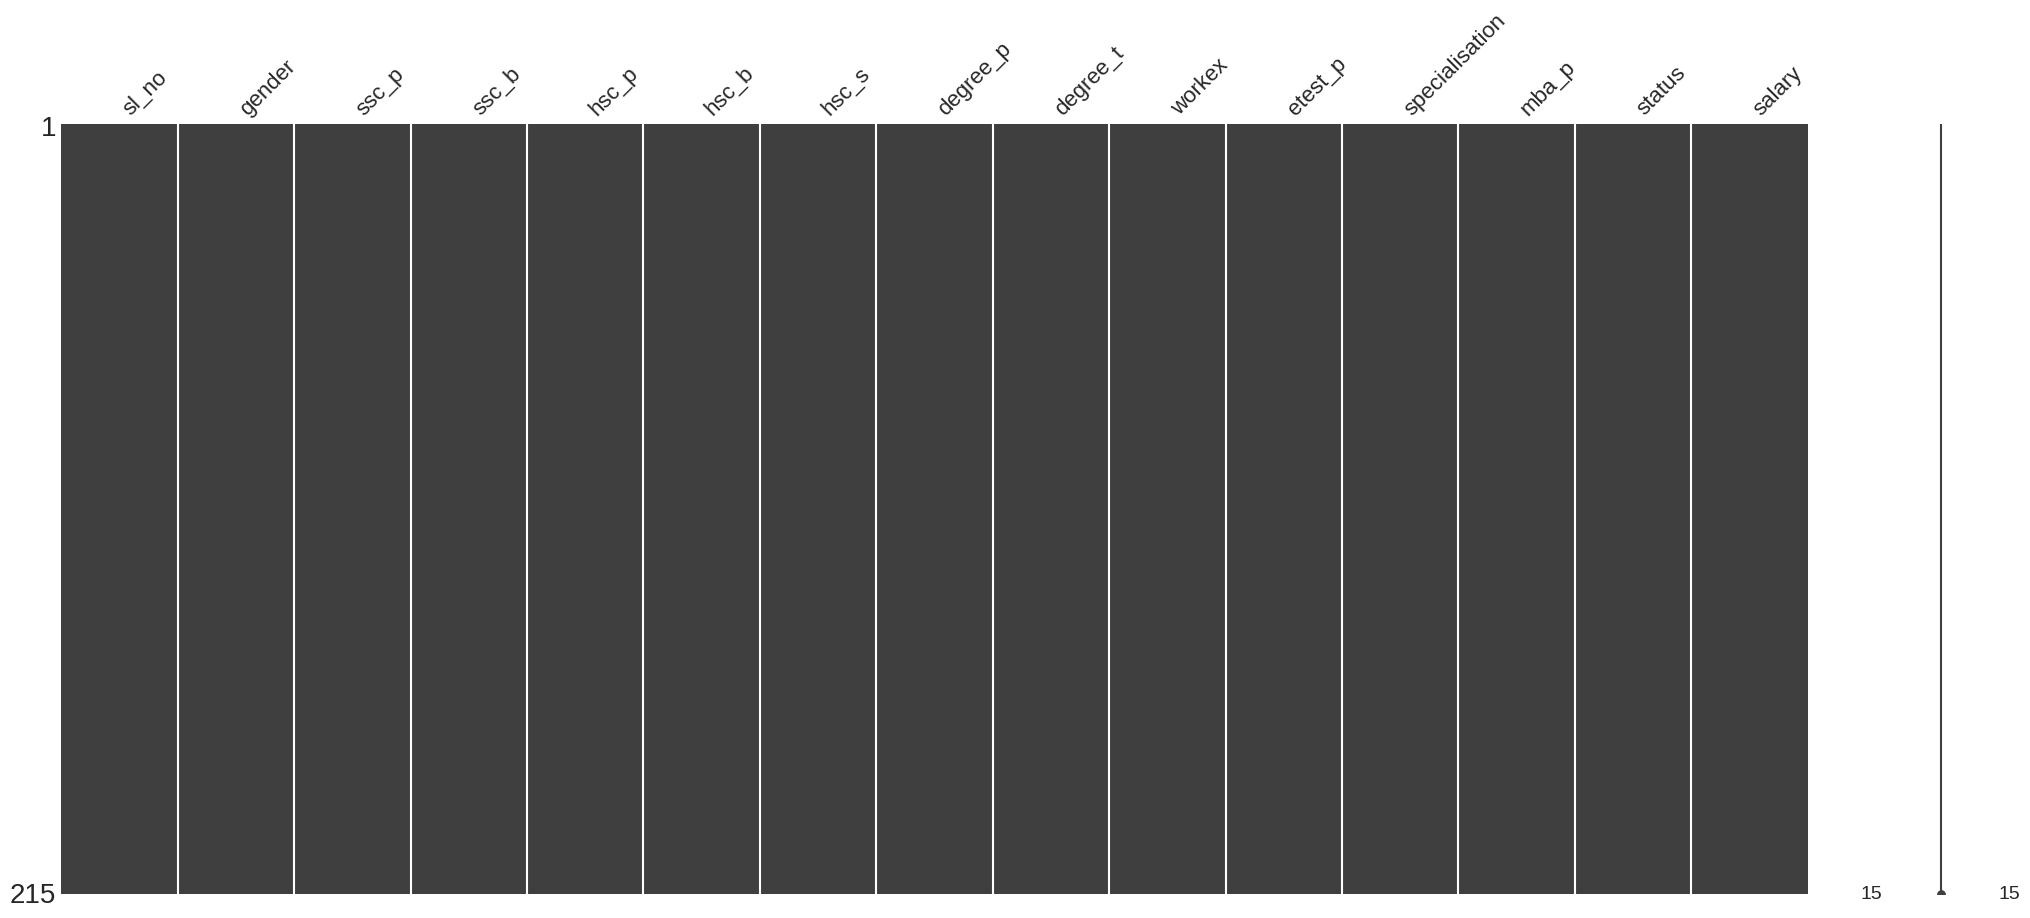

In [ ]:
data['salary'].fillna(value=0, inplace=True)
msno.matrix(data)

Kita cek outlier (Data dengan nilai ekstrem) dengan matplotlib (boxplot)

<ipython-input-70-151ed815e974>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Persentase Ketrima Kerja')

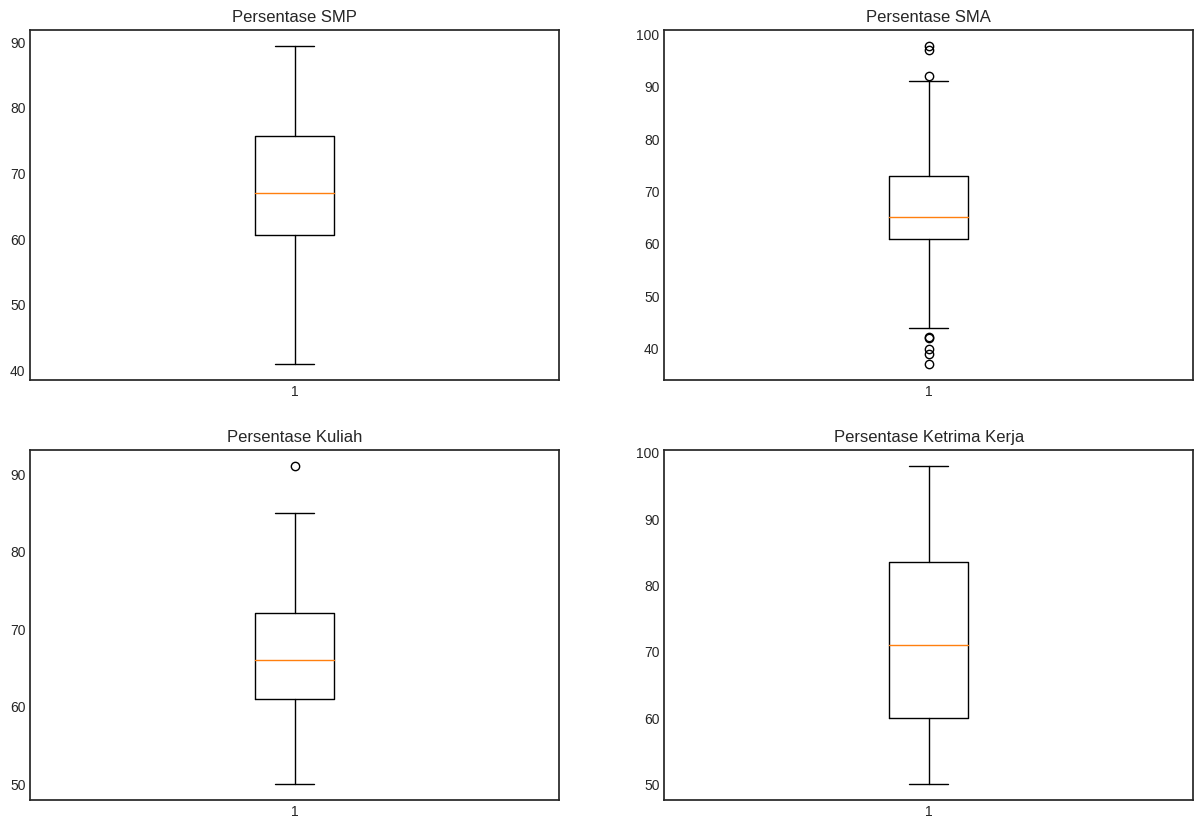

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data['ssc_p'])
ax.set_title('Persentase SMP')
ax=plt.subplot(222)
plt.boxplot(data['hsc_p'])
ax.set_title('Persentase SMA')
ax=plt.subplot(223)
plt.boxplot(data['degree_p'])
ax.set_title('Persentase Kuliah')
ax=plt.subplot(224)
plt.boxplot(data['etest_p'])
ax.set_title('Persentase Ketrima Kerja')

Terdapat data outlier di persentase SMA dan Kuliah. Filter data hanya yang ada di range IQR (interquartile range)

In [ ]:
Q1 = data['hsc_p'].quantile(0.25)
Q3 = data["hsc_p"].quantile(0.75)
IQR = Q3-Q1
filter = (data['hsc_p'] > Q1 - 1.5 * IQR) & (data['hsc_p'] <= Q3 + 1.5 * IQR)
data_filtered = data.loc[filter]

Visualisasi lagi

<ipython-input-73-295bfbd71512>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Persentase Ketrima Kerja')

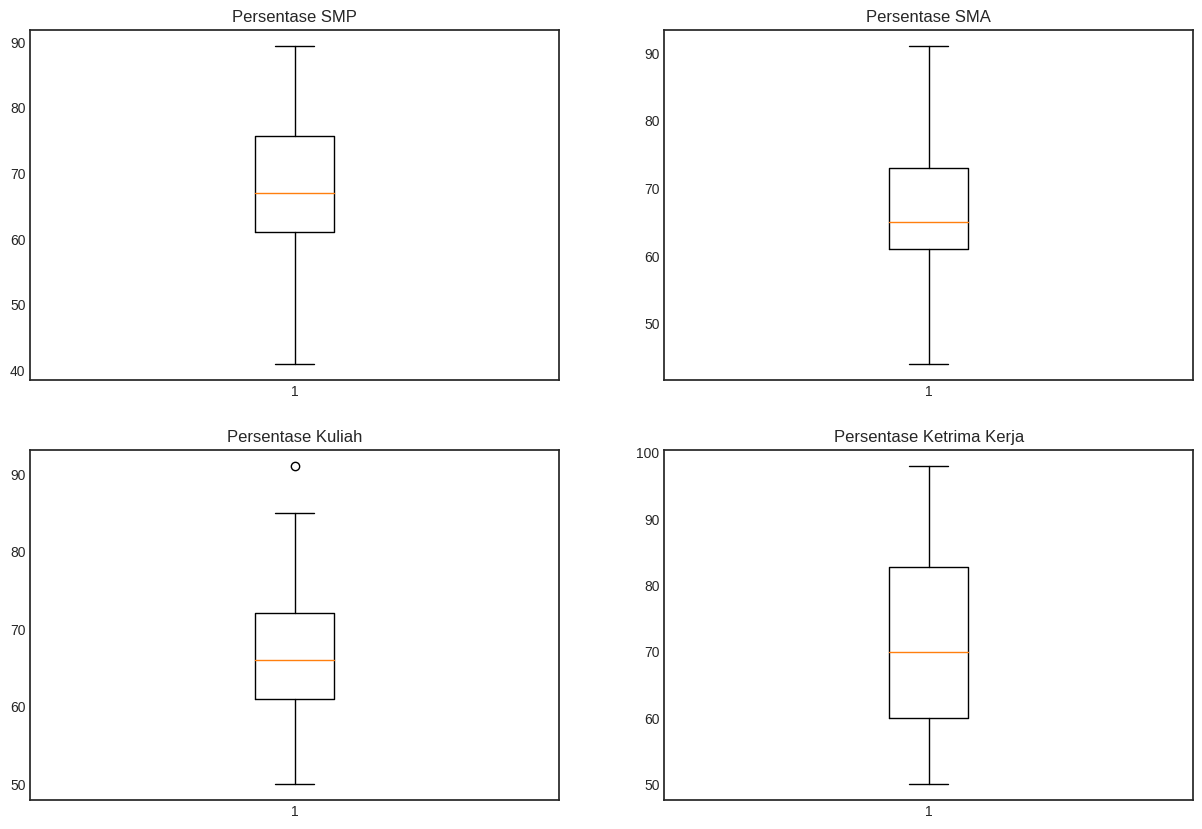

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data_filtered['ssc_p'])
ax.set_title('Persentase SMP')
ax=plt.subplot(222)
plt.boxplot(data_filtered['hsc_p'])
ax.set_title('Persentase SMA')
ax=plt.subplot(223)
plt.boxplot(data_filtered['degree_p'])
ax.set_title('Persentase Kuliah')
ax=plt.subplot(224)
plt.boxplot(data_filtered['etest_p'])
ax.set_title('Persentase Ketrima Kerja')